In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from patsy import dmatrices
import statsmodels.api as sm
import seaborn as sns

In [ ]:
df = pd.read_csv("disney_movies_cleaned.csv")
df[:5]

,movie_id,movie_name,year,certificate,runtime,rating,description,director,director_id,star,star_id,votes,gross(in $),Genre1,Genre2,Genre3
0,tt1825683,Black Panther,2018,PG-13,134 min,7.3,"T'Challa, heir to the hidden but advanced king...",Ryan Coogler,/name/nm3363032/,"Chadwick Boseman, \nMichael B. Jordan, \nLupit...","/name/nm1569276/,/name/nm0430107/,/name/nm2143...",785813.0,700059566.0,Action,Adventure,Sci-Fi
1,tt4154796,Avengers: Endgame,2019,PG-13,181 min,8.4,After the devastating events of Avengers: Infi...,"Anthony Russo, \nJoe Russo",/name/nm0751577/,"Robert Downey Jr., \nChris Evans, \nMark Ruffa...","/name/nm0751648/,/name/nm0000375/,/name/nm0262...",1148100.0,858373000.0,Action,Adventure,Drama
2,tt0478970,Ant-Man,2015,PG-13,117 min,7.3,Armed with a super-suit with the astonishing a...,Peyton Reed,/name/nm0715636/,"Paul Rudd, \nMichael Douglas, \nCorey Stoll, \...","/name/nm0748620/,/name/nm0000140/,/name/nm1015...",675514.0,180202163.0,Action,Comedy,Sci-Fi
3,tt9032400,Eternals,2021,PG-13,156 min,6.3,"The saga of the Eternals, a race of immortal b...",Chloé Zhao,/name/nm2125482/,"Gemma Chan, \nRichard Madden, \nAngelina Jolie...","/name/nm2110418/,/name/nm0534635/,/name/nm0001...",348052.0,164870234.0,Action,Adventure,Fantasy
4,tt4154756,Avengers: Infinity War,2018,PG-13,149 min,8.4,The Avengers and their allies must be willing ...,"Anthony Russo, \nJoe Russo",/name/nm0751577/,"Robert Downey Jr., \nChris Hemsworth, \nMark R...","/name/nm0751648/,/name/nm0000375/,/name/nm1165...",1095301.0,678815482.0,Action,Adventure,Sci-Fi


In [ ]:
# Analyze correlation between movie runtime and gross income
# First change the data type of runtime to int
df['runtime'] = df['runtime'].str.replace(' min', '').astype(int)

# First analyze the correlation between runtime and gross income on the entire dataset
y, X = dmatrices('Q("gross(in $)") ~ runtime', data=df, return_type='dataframe')

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Q("gross(in $)")   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     49.48
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           4.80e-12
Time:                        15:35:48   Log-Likelihood:                -14000.
No. Observations:                 700   AIC:                         2.800e+04
Df Residuals:                     698   BIC:                         2.801e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.119e+07   2.38e+07     -2.993      0.0

In [ ]:
recent_movies = df[df['year'] >= 2010]

# Then analyze the correlation between runtime and gross income on movies after 2010
y_recent, X_recent = dmatrices('Q("gross(in $)") ~ runtime', data=recent_movies, return_type='dataframe')

# Fit the model
model_recent = sm.OLS(y_recent, X_recent)
results_recent = model_recent.fit()

print(results_recent.summary())

                            OLS Regression Results                            
Dep. Variable:       Q("gross(in $)")   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     24.55
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           2.02e-06
Time:                        15:35:48   Log-Likelihood:                -2959.1
No. Observations:                 145   AIC:                             5922.
Df Residuals:                     143   BIC:                             5928.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.154e+08   8.73e+07     -2.468      0.0

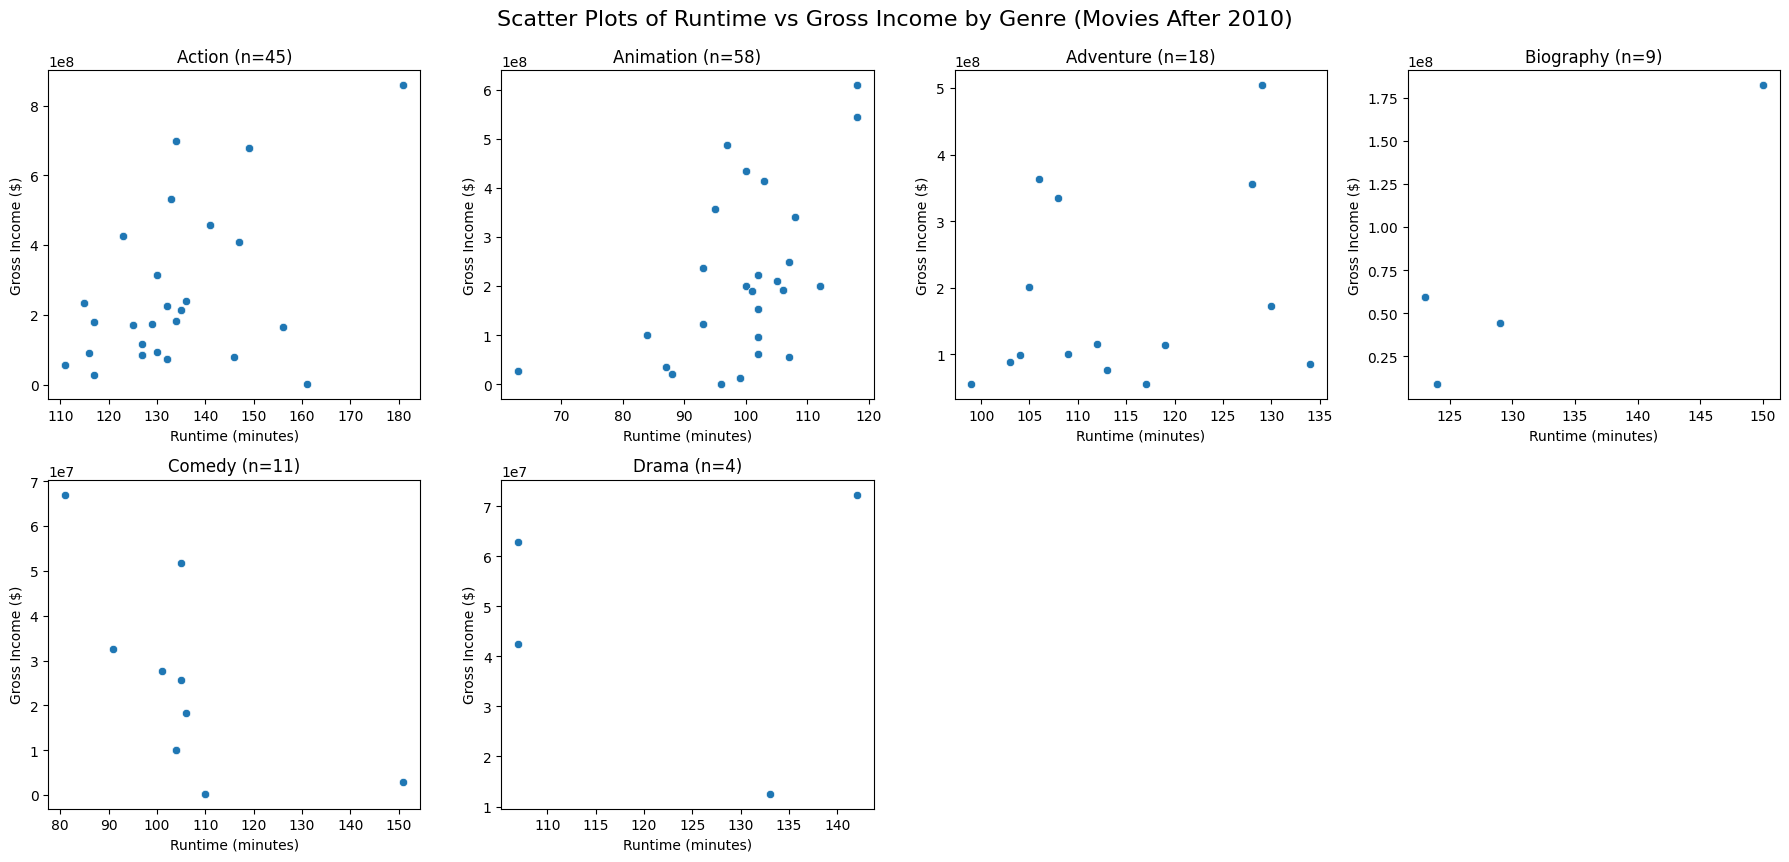

In [ ]:
# Create scatter plots for each genre with movies from 2010 onwards
plt.figure(figsize=(18, 12))
genres = recent_movies['Genre1'].unique()
for i, genre in enumerate(genres, 1):
    plt.subplot(3, 4, i)
    genre_data = recent_movies[recent_movies['Genre1'] == genre]
    sns.scatterplot(x='runtime', y='gross(in $)', data=genre_data)
    plt.title(f'{genre} (n={genre_data.shape[0]})')
    plt.xlabel('Runtime (minutes)')
    plt.ylabel('Gross Income ($)')
    plt.tight_layout()

plt.suptitle('Scatter Plots of Runtime vs Gross Income by Genre (Movies After 2010)', fontsize=16, y=1.02)
plt.show()

In [ ]:
# Filter the datasets by genre for Action, Animation, and Comedy
action_data = recent_movies[recent_movies['Genre1'] == 'Action']
animation_data = recent_movies[recent_movies['Genre1'] == 'Animation']
comedy_data = recent_movies[recent_movies['Genre1'] == 'Comedy']

# Prepare data and fit linear regression models for each genre
models = {}
for genre, data in [('Action', action_data), ('Animation', animation_data), ('Comedy', comedy_data)]:
    y_genre, X_genre = dmatrices('Q("gross(in $)") ~ runtime', data=data, return_type='dataframe')
    model_genre = sm.OLS(y_genre, X_genre)
    results_genre = model_genre.fit()
    models[genre] = results_genre

# Display the summary of regression for each genre
model_summaries = {genre: results.summary() for genre, results in models.items()}
model_summaries['Action'], model_summaries['Animation'], model_summaries['Comedy']


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:       Q("gross(in $)")   R-squared:                       0.294
 Model:                            OLS   Adj. R-squared:                  0.277
 Method:                 Least Squares   F-statistic:                     17.90
 Date:                Mon, 22 Apr 2024   Prob (F-statistic):           0.000120
 Time:                        15:35:59   Log-Likelihood:                -921.74
 No. Observations:                  45   AIC:                             1847.
 Df Residuals:                      43   BIC:                             1851.
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

In [ ]:
# Checking the distribution of the "rating" column to decide on bins
rating_distribution = recent_movies['rating'].describe()

# Define bins for the ratings: typically, 0-5, 5-7, 7-9, 9-10 could be a practical grouping
bins = [0, 5, 7, 9, 10]
labels = ['0-5', '5-7', '7-9', '9-10']

# Creating a new column for rating groups
recent_movies['rating_group'] = pd.cut(recent_movies['rating'], bins=bins, labels=labels, right=False)

# Grouping movies by rating groups and calculating average runtime and gross income
rating_group_analysis = recent_movies.groupby('rating_group').agg(
    average_runtime=('runtime', 'mean'),
    average_gross=('gross(in $)', 'mean'),
    count=('movie_id', 'count')  # Count of movies per rating group for context
)

rating_distribution, rating_group_analysis

<ipython-input-7-8b0dda342f70>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_movies['rating_group'] = pd.cut(recent_movies['rating'], bins=bins, labels=labels, right=False)


(count    145.000000
 mean       6.997931
 std        0.772125
 min        4.200000
 25%        6.600000
 50%        7.100000
 75%        7.500000
 max        8.400000
 Name: rating, dtype: float64,
               average_runtime  average_gross  count
 rating_group                                       
 0-5                109.000000   1.004786e+08      1
 5-7                112.453125   1.314265e+08     64
 7-9                118.087500   2.755797e+08     80
 9-10                      NaN            NaN      0)

Finding success patterns based on genres

In [ ]:
len(recent_movies)
mean_gross = recent_movies["gross(in $)"].mean()
movies_above_mean = recent_movies[recent_movies["gross(in $)"] > mean_gross]
len(movies_above_mean)
recent_movies[:5]

,movie_id,movie_name,year,certificate,runtime,rating,description,director,director_id,star,star_id,votes,gross(in $),Genre1,Genre2,Genre3,rating_group
0,tt1825683,Black Panther,2018,PG-13,134,7.3,"T'Challa, heir to the hidden but advanced king...",Ryan Coogler,/name/nm3363032/,"Chadwick Boseman, \nMichael B. Jordan, \nLupit...","/name/nm1569276/,/name/nm0430107/,/name/nm2143...",785813.0,700059566.0,Action,Adventure,Sci-Fi,7-9
1,tt4154796,Avengers: Endgame,2019,PG-13,181,8.4,After the devastating events of Avengers: Infi...,"Anthony Russo, \nJoe Russo",/name/nm0751577/,"Robert Downey Jr., \nChris Evans, \nMark Ruffa...","/name/nm0751648/,/name/nm0000375/,/name/nm0262...",1148100.0,858373000.0,Action,Adventure,Drama,7-9
2,tt0478970,Ant-Man,2015,PG-13,117,7.3,Armed with a super-suit with the astonishing a...,Peyton Reed,/name/nm0715636/,"Paul Rudd, \nMichael Douglas, \nCorey Stoll, \...","/name/nm0748620/,/name/nm0000140/,/name/nm1015...",675514.0,180202163.0,Action,Comedy,Sci-Fi,7-9
3,tt9032400,Eternals,2021,PG-13,156,6.3,"The saga of the Eternals, a race of immortal b...",Chloé Zhao,/name/nm2125482/,"Gemma Chan, \nRichard Madden, \nAngelina Jolie...","/name/nm2110418/,/name/nm0534635/,/name/nm0001...",348052.0,164870234.0,Action,Adventure,Fantasy,5-7
4,tt4154756,Avengers: Infinity War,2018,PG-13,149,8.4,The Avengers and their allies must be willing ...,"Anthony Russo, \nJoe Russo",/name/nm0751577/,"Robert Downey Jr., \nChris Hemsworth, \nMark R...","/name/nm0751648/,/name/nm0000375/,/name/nm1165...",1095301.0,678815482.0,Action,Adventure,Sci-Fi,7-9


In [ ]:
# Read the data again
df = pd.read_csv("disney_movies_cleaned.csv")
pd.set_option('display.max_columns', None)

# Ensure we're working with movies from 2010 onwards
recent_movies = df[df['year'] >= 2010].copy()

# Trim whitespace and convert to consistent case (lowercase) before combining genres
recent_movies.loc[:, 'Genre1'] = recent_movies['Genre1'].str.strip().str.lower()
recent_movies.loc[:, 'Genre2'] = recent_movies['Genre2'].str.strip().str.lower()
recent_movies.loc[:, 'Genre3'] = recent_movies['Genre3'].str.strip().str.lower()

# Combine the genre columns into a single set of genres for each movie
recent_movies.loc[:, 'all_genres'] = recent_movies[['Genre1', 'Genre2', 'Genre3']].apply(
    lambda x: ','.join(sorted(set(x.dropna()))), axis=1
)

# Create dummy variables for the combined genres
# Ensure to use ',' as the separator since we've standardized it above
genre_dummies = recent_movies['all_genres'].str.get_dummies(sep=',')

# Explore the data
# print(recent_movies.head())
# print(genre_dummies.head())
genre_dummies

# Concatenate the cleaned dummy variables with the recent_movies DataFrame
recent_movies_with_genres = pd.concat([recent_movies, genre_dummies], axis=1)

# List all columns to ensure it processed correctly
all_columns = recent_movies_with_genres.columns.tolist()
all_columns

recent_movies_with_genres

,movie_id,movie_name,year,certificate,runtime,rating,description,director,director_id,star,star_id,votes,gross(in $),Genre1,Genre2,Genre3,all_genres,action,adventure,animation,biography,comedy,crime,drama,family,fantasy,history,horror,music,romance,sci-fi,sport,thriller
0,tt1825683,Black Panther,2018,PG-13,134 min,7.3,"T'Challa, heir to the hidden but advanced king...",Ryan Coogler,/name/nm3363032/,"Chadwick Boseman, \nMichael B. Jordan, \nLupit...","/name/nm1569276/,/name/nm0430107/,/name/nm2143...",785813.0,700059566.0,action,adventure,sci-fi,"action,adventure,sci-fi",1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,tt4154796,Avengers: Endgame,2019,PG-13,181 min,8.4,After the devastating events of Avengers: Infi...,"Anthony Russo, \nJoe Russo",/name/nm0751577/,"Robert Downey Jr., \nChris Evans, \nMark Ruffa...","/name/nm0751648/,/name/nm0000375/,/name/nm0262...",1148100.0,858373000.0,action,adventure,drama,"action,adventure,drama",1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,tt0478970,Ant-Man,2015,PG-13,117 min,7.3,Armed with a super-suit with the astonishing a...,Peyton Reed,/name/nm0715636/,"Paul Rudd, \nMichael Douglas, \nCorey Stoll, \...","/name/nm0748620/,/name/nm0000140/,/name/nm1015...",675514.0,180202163.0,action,comedy,sci-fi,"action,comedy,sci-fi",1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,tt9032400,Eternals,2021,PG-13,156 min,6.3,"The saga of the Eternals, a race of immortal b...",Chloé Zhao,/name/nm2125482/,"Gemma Chan, \nRichard Madden, \nAngelina Jolie...","/name/nm2110418/,/name/nm0534635/,/name/nm0001...",348052.0,164870234.0,action,adventure,fantasy,"action,adventure,fantasy",1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,tt4154756,Avengers: Infinity War,2018,PG-13,149 min,8.4,The Avengers and their allies must be willing ...,"Anthony Russo, \nJoe Russo",/name/nm0751577/,"Robert Downey Jr., \nChris Hemsworth, \nMark R...","/name/nm0751648/,/name/nm0000375/,/name/nm1165...",1095301.0,678815482.0,action,adventure,sci-fi,"action,adventure,sci-fi",1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,tt0433035,Real Steel,2011,UA,127 min,7.0,"In the near future, robot boxing is a top spor...",Shawn Levy,/name/nm0506613/,"Hugh Jackman, \nEvangeline Lilly, \nDakota Goy...","/name/nm0413168/,/name/nm1431940/,/name/nm2023...",335114.0,85468508.0,action,drama,sci-fi,"action,drama,sci-fi",1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
661,tt3606752,Cars 3,2017,U,102 min,6.7,Lightning McQueen sets out to prove to a new g...,Brian Fee,/name/nm0270263/,"Owen Wilson, \nCristela Alonzo, \nChris Cooper...","/name/nm0005562/,/name/nm2242399/,/name/nm0177...",104538.0,152901115.0,animation,adventure,comedy,"adventure,animation,comedy",0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
672,tt2097298,"McFarland, USA",2015,PG,129 min,7.4,Jim White moves his family after losing his la...,Niki Caro,/name/nm0138927/,"Kevin Costner, \nMaria Bello, \nRamiro Rodrigu...","/name/nm0000126/,/name/nm0004742/,/name/nm7107...",39785.0,44469602.0,biography,drama,sport,"biography,drama,sport",0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
677,tt1028576,Secretariat,2010,PG,123 min,7.2,Penny Chenery Tweedy and colleagues guide her ...,Randall Wallace,/name/nm0908824/,"Diane Lane, \nJohn Malkovich, \nMargo Martinda...","/name/nm0000178/,/name/nm0000518/,/name/nm0553...",29155.0,59713955.0,biography,drama,family,"biography,drama,family",0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from patsy import dmatrices

# Assuming 'recent_movies_with_genres' is your DataFrame including dummy variables for genres

# Define the 'hit' variable based on the mean gross income
mean_gross = recent_movies_with_genres['gross(in $)'].mean()
recent_movies_with_genres['is_hit'] = (recent_movies_with_genres['gross(in $)'] > mean_gross).astype(int)

# # Define your features (X) and target variable (y)
# X = recent_movies_with_genres[genre_dummies.columns]  # This includes all your genre dummy variables
# y = recent_movies_with_genres['is_hit']

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize the model
# clf = RandomForestClassifier(random_state=42)

# # Train the model
# clf.fit(X_train, y_train)

# # Make predictions
# y_pred = clf.predict(X_test)

# # Evaluate the model
# print(accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))


In [ ]:
# Create formula
formula = 'is_hit ~ ' + ' + '.join(['Q("'+x+'")' \
                                    for x in genre_dummies.columns])
print(formula)

is_hit ~ Q("action") + Q("adventure") + Q("animation") + Q("biography") + Q("comedy") + Q("crime") + Q("drama") + Q("family") + Q("fantasy") + Q("history") + Q("horror") + Q("music") + Q("romance") + Q("sci-fi") + Q("sport") + Q("thriller")


In [ ]:
# Create design matrices
Y, X = dmatrices(formula, recent_movies_with_genres, return_type='dataframe')
y = Y['is_hit'].values

In [ ]:
# Create training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=1)

In [ ]:
# All the models we want to test out
models = {}
models['Decision Tree'] = \
    tree.DecisionTreeClassifier(criterion='entropy')

models['Bagging'] = \
    BaggingClassifier(
        tree.DecisionTreeClassifier(criterion='entropy'),
        random_state=1)

models['Random Forest'] = \
    RandomForestClassifier(n_estimators=10,
                           random_state=1)

models['Gradient Boosting'] = \
    GradientBoostingClassifier(n_estimators=40,
                               max_depth=2,
                               random_state=1)

In [ ]:
for name, model in models.items():
    print('Fitting', name)
    model.fit(X_train, y_train)

Fitting Decision Tree
Fitting Bagging
Fitting Random Forest
Fitting Gradient Boosting


In [ ]:
from sklearn import metrics
from pandas import Series, DataFrame

accuracy_train = {}
accuracy_test = {}
for name, model in models.items():
    prediction_train = model.predict(X_train)
    accuracy_train[name] = metrics.accuracy_score(y_train, prediction_train)
    prediction_test = model.predict(X_test)
    accuracy_test[name] = metrics.accuracy_score(y_test, prediction_test)

df = DataFrame({'Training Accuracy':accuracy_train, 'Test Accuracy':accuracy_test})
df

,Training Accuracy,Test Accuracy
Decision Tree,0.762376,0.522727
Bagging,0.762376,0.613636
Random Forest,0.762376,0.613636
Gradient Boosting,0.742574,0.636364


In [ ]:
from pandas import Series, DataFrame
import pandas as pd
from patsy import dmatrices
%pylab inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'Test accuracy')

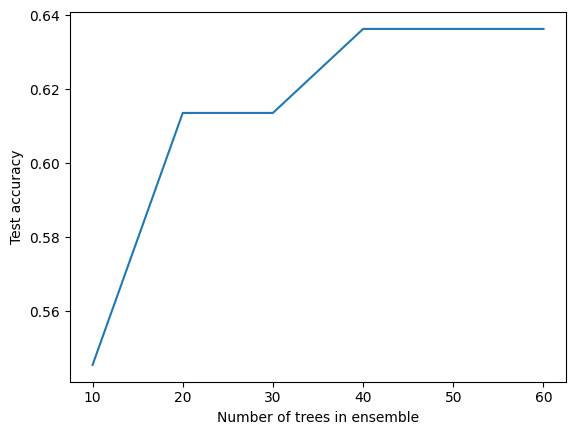

In [ ]:
scores = {}
for num_trees in [10, 20, 30, 40, 50, 60]:
    model = GradientBoostingClassifier(n_estimators=num_trees,
                                       max_depth=2,
                                       random_state=1)
    model.fit(X_train, y_train)
    prediction_test = model.predict(X_test)
    accuracy_test = metrics.accuracy_score(y_test, prediction_test)
    scores[num_trees] = accuracy_test
Series(scores).sort_index().plot()
xlabel('Number of trees in ensemble')
ylabel('Test accuracy')

40 is the best number of trees

Text(0, 0.5, 'Test accuracy')

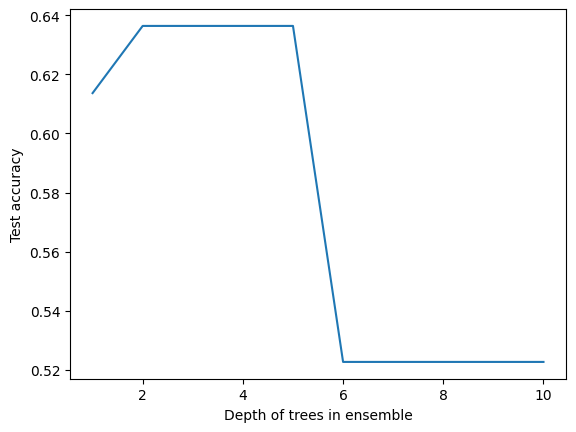

In [ ]:
# How about the depth of the trees?
scores = {}
for depth in range(1, 11):
    model = GradientBoostingClassifier(n_estimators=40,
                                       max_depth=depth,
                                       random_state=1)
    model.fit(X_train, y_train)
    prediction_test = model.predict(X_test)
    accuracy_test = metrics.accuracy_score(y_test, prediction_test)
    scores[depth] = accuracy_test
Series(scores).sort_index().plot()
xlabel('Depth of trees in ensemble')
ylabel('Test accuracy')

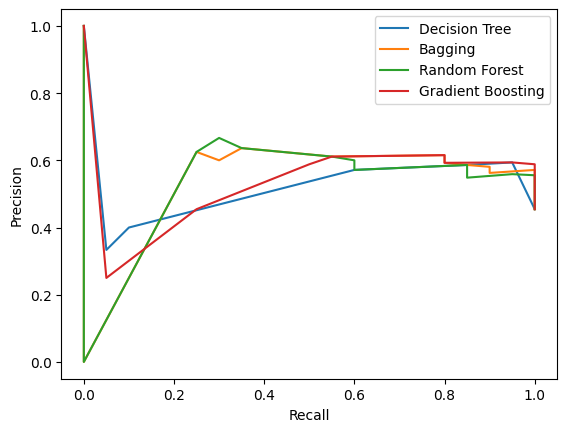

In [ ]:
from sklearn.metrics import precision_recall_curve

for index, (name, model) in enumerate(models.items()):
    predictions = model.predict_proba(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, predictions[:, 1])
    plot(recall, precision, label=name)

xlabel('Recall')
ylabel('Precision')
legend(loc='best')

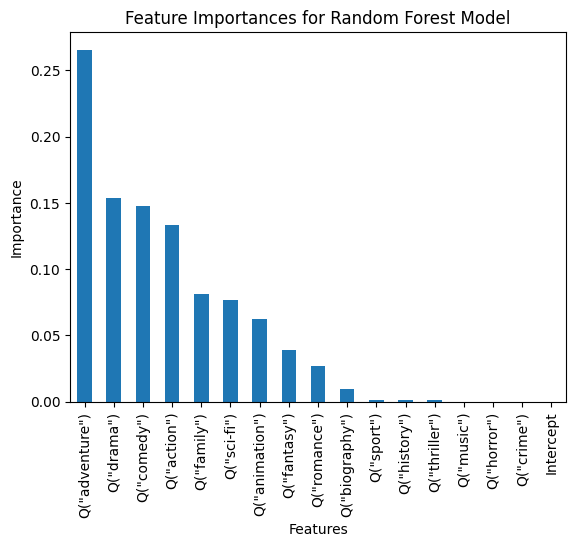

In [ ]:
importances = models["Random Forest"].feature_importances_

# Map the feature importances to the corresponding genre names
genre_importances = pd.Series(importances, index=X.columns)

# Sort the importances
sorted_importances = genre_importances.sort_values(ascending=False)

# Plot the importances
sorted_importances.plot(kind='bar')
plt.title('Feature Importances for Random Forest Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [ ]:
# Adding Director dummy variables to the dataset
# Assuming recent_movies_with_genres is already defined and has the 'director' column cleaned

# Step 1: Split directors and explode into separate rows
recent_movies_with_genres['director'] = recent_movies_with_genres['director'].str.split(',\s*')
directors_expanded = recent_movies_with_genres.explode('director')

# # Step 2: Frequency filtering
director_counts = directors_expanded['director'].value_counts()
frequent_directors = director_counts[director_counts >= 3].index  # replace X with your threshold

# Create dummy variables for frequent directors only
director_dummies = pd.get_dummies(directors_expanded['director']).loc[:, frequent_directors]

# Group by 'movie_id' and use the sum to aggregate; this will keep directors as 1 if they were involved
director_dummies = director_dummies.groupby(directors_expanded['movie_id']).max().reset_index()

# Exclude the 'movie_id' column when converting the data types
for column in director_dummies.columns:
    if column != 'movie_id':
        director_dummies[column] = director_dummies[column].astype(int)

# Now merge with the original DataFrame
recent_movies_with_directors = recent_movies_with_genres.merge(director_dummies, on='movie_id', how='left')

# The DataFrame now has genre and director features ready for ML models


In [ ]:
recent_movies_with_directors

,movie_id,movie_name,year,certificate,runtime,rating,description,director,director_id,star,star_id,votes,gross(in $),Genre1,Genre2,Genre3,all_genres,action,adventure,animation,biography,comedy,crime,drama,family,fantasy,history,horror,music,romance,sci-fi,sport,thriller,is_hit,Don Hall,Rich Moore,Byron Howard,Joe Russo,Anthony Russo,Steven Spielberg,Chris Williams,Brad Bird,Jared Bush,Tim Burton,Andrew Stanton,Lee Unkrich,Randall Wallace,John Lasseter,Brian Fee,Craig Gillespie,Nathan Greno,Phil Johnston,Bradford Lewis,Shawn Levy,Jon Favreau
0,tt1825683,Black Panther,2018,PG-13,134 min,7.3,"T'Challa, heir to the hidden but advanced king...",[Ryan Coogler],/name/nm3363032/,"Chadwick Boseman, \nMichael B. Jordan, \nLupit...","/name/nm1569276/,/name/nm0430107/,/name/nm2143...",785813.0,700059566.0,action,adventure,sci-fi,"action,adventure,sci-fi",1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt4154796,Avengers: Endgame,2019,PG-13,181 min,8.4,After the devastating events of Avengers: Infi...,"[Anthony Russo, Joe Russo]",/name/nm0751577/,"Robert Downey Jr., \nChris Evans, \nMark Ruffa...","/name/nm0751648/,/name/nm0000375/,/name/nm0262...",1148100.0,858373000.0,action,adventure,drama,"action,adventure,drama",1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,tt0478970,Ant-Man,2015,PG-13,117 min,7.3,Armed with a super-suit with the astonishing a...,[Peyton Reed],/name/nm0715636/,"Paul Rudd, \nMichael Douglas, \nCorey Stoll, \...","/name/nm0748620/,/name/nm0000140/,/name/nm1015...",675514.0,180202163.0,action,comedy,sci-fi,"action,comedy,sci-fi",1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt9032400,Eternals,2021,PG-13,156 min,6.3,"The saga of the Eternals, a race of immortal b...",[Chloé Zhao],/name/nm2125482/,"Gemma Chan, \nRichard Madden, \nAngelina Jolie...","/name/nm2110418/,/name/nm0534635/,/name/nm0001...",348052.0,164870234.0,action,adventure,fantasy,"action,adventure,fantasy",1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,tt4154756,Avengers: Infinity War,2018,PG-13,149 min,8.4,The Avengers and their allies must be willing ...,"[Anthony Russo, Joe Russo]",/name/nm0751577/,"Robert Downey Jr., \nChris Hemsworth, \nMark R...","/name/nm0751648/,/name/nm0000375/,/name/nm1165...",1095301.0,678815482.0,action,adventure,sci-fi,"action,adventure,sci-fi",1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,tt0433035,Real Steel,2011,UA,127 min,7.0,"In the near future, robot boxing is a top spor...",[Shawn Levy],/name/nm0506613/,"Hugh Jackman, \nEvangeline Lilly, \nDakota Goy...","/name/nm0413168/,/name/nm1431940/,/name/nm2023...",335114.0,85468508.0,action,drama,sci-fi,"action,drama,sci-fi",1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
141,tt3606752,Cars 3,2017,U,102 min,6.7,Lightning McQueen sets out to prove to a new g...,[Brian Fee],/name/nm0270263/,"Owen Wilson, \nCristela Alonzo, \nChris Cooper...","/name/nm0005562/,/name/nm2242399/,/name/nm0177...",104538.0,152901115.0,animation,adventure,comedy,"adventure,animation,comedy",0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
142,tt2097298,"McFarland, USA",2015,PG,129 min,7.4,Jim White moves his family after losing his la...,[Niki Caro],/name/nm0138927/,"Kevin Costner, \nMaria Bello, \nRamiro Rodrigu...","/name/nm0000126/,/name/nm0004742/,/name/nm7107...",39785.0,44469602.0,biography,drama,sport,"biography,drama,sport",0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
143,tt1028576,Secretariat,2010,PG,123 min,7.2,Penny Chenery Tweedy and colleagues guide her ...,[Randall Wallace],/name/nm0908824/,"Diane Lane, \nJohn Malkovich, \nMargo Ma

In [ ]:
# Create formula
formula = 'is_hit ~ ' + ' + '.join(['Q("'+x+'")' \
                                    for x in genre_dummies.columns]) + ' + ' + ' + '.join(['Q("'+x+'")' \
                                                                                   for x in director_dummies.iloc[:, 1:].columns])
print(formula)

is_hit ~ Q("action") + Q("adventure") + Q("animation") + Q("biography") + Q("comedy") + Q("crime") + Q("drama") + Q("family") + Q("fantasy") + Q("history") + Q("horror") + Q("music") + Q("romance") + Q("sci-fi") + Q("sport") + Q("thriller") + Q("Don Hall") + Q("Rich Moore") + Q("Byron Howard") + Q("Joe Russo") + Q("Anthony Russo") + Q("Steven Spielberg") + Q("Chris Williams") + Q("Brad Bird") + Q("Jared Bush") + Q("Tim Burton") + Q("Andrew Stanton") + Q("Lee Unkrich") + Q("Randall Wallace") + Q("John Lasseter") + Q("Brian Fee") + Q("Craig Gillespie") + Q("Nathan Greno") + Q("Phil Johnston") + Q("Bradford Lewis") + Q("Shawn Levy") + Q("Jon Favreau")


In [ ]:
# Create design matrices
Y, X = dmatrices(formula, recent_movies_with_directors, return_type='dataframe')
y = Y['is_hit'].values

In [ ]:
# Create training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=1)

In [ ]:
# All the models we want to test out
models = {}
models['Decision Tree'] = \
    tree.DecisionTreeClassifier(criterion='entropy')

models['Bagging'] = \
    BaggingClassifier(
        tree.DecisionTreeClassifier(criterion='entropy'),
        random_state=1)

models['Random Forest'] = \
    RandomForestClassifier(n_estimators=10,
                           random_state=1)

models['Gradient Boosting'] = \
    GradientBoostingClassifier(n_estimators=150,
                               max_depth=2,
                               random_state=1)

In [ ]:
for name, model in models.items():
    print('Fitting', name)
    model.fit(X_train, y_train)

Fitting Decision Tree
Fitting Bagging
Fitting Random Forest
Fitting Gradient Boosting


In [ ]:
from sklearn import metrics
from pandas import Series, DataFrame

accuracy_train = {}
accuracy_test = {}
for name, model in models.items():
    prediction_train = model.predict(X_train)
    accuracy_train[name] = metrics.accuracy_score(y_train, prediction_train)
    prediction_test = model.predict(X_test)
    accuracy_test[name] = metrics.accuracy_score(y_test, prediction_test)

df = DataFrame({'Training Accuracy':accuracy_train, 'Test Accuracy':accuracy_test})
df

,Training Accuracy,Test Accuracy
Decision Tree,0.851485,0.727273
Bagging,0.841584,0.681818
Random Forest,0.831683,0.681818
Gradient Boosting,0.851485,0.727273


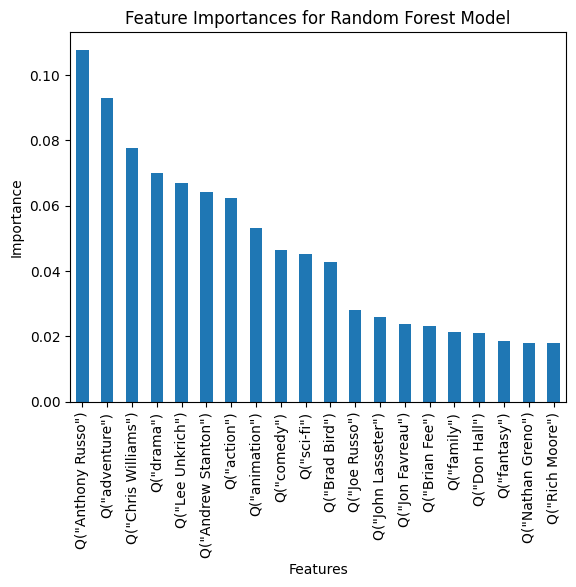

In [ ]:
importances = models["Random Forest"].feature_importances_

# Map the feature importances to the corresponding genre names
genre_importances = pd.Series(importances, index=X.columns)

# Sort the importances
sorted_importances = genre_importances.sort_values(ascending=False)

# Plot the importances
sorted_importances.head(20).plot(kind='bar')
plt.title('Feature Importances for Random Forest Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

Text(0, 0.5, 'Test accuracy')

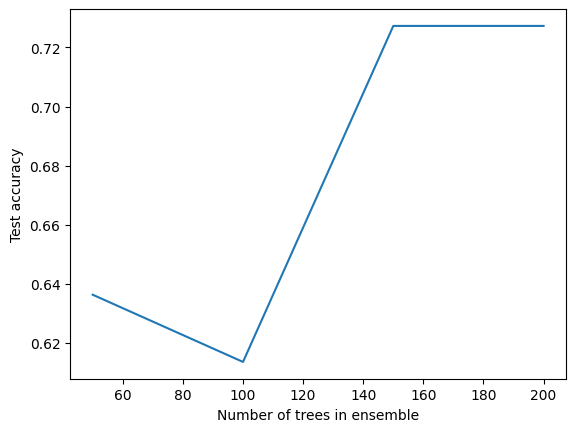

In [ ]:
scores = {}
for num_trees in [50, 100, 150, 200]:
    model = GradientBoostingClassifier(n_estimators=num_trees,
                                       max_depth=2,
                                       random_state=1)
    model.fit(X_train, y_train)
    prediction_test = model.predict(X_test)
    accuracy_test = metrics.accuracy_score(y_test, prediction_test)
    scores[num_trees] = accuracy_test
Series(scores).sort_index().plot()
xlabel('Number of trees in ensemble')
ylabel('Test accuracy')

In [ ]:
# How about the depth of the trees?
scores = {}
for depth in range(1, 5):
    model = GradientBoostingClassifier(n_estimators=600,
                                       max_depth=depth,
                                       random_state=1)
    model.fit(X_train, y_train)
    prediction_test = model.predict(X_test)
    accuracy_test = metrics.accuracy_score(y_test, prediction_test)
    scores[depth] = accuracy_test
Series(scores).sort_index().plot()
xlabel('Depth of trees in ensemble')
ylabel('Test accuracy')

In [ ]:
for index, (name, model) in enumerate(models.items()):
    predictions = model.predict_proba(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, predictions[:, 1])
    plot(recall, precision, label=name)

xlabel('Recall')
ylabel('Precision')
legend(loc='best')

In [ ]:
recent_movies_with_genres.head()

Adding Star to the ML model!

In [ ]:
# Adding Star dummy variables to the dataset
# Assuming recent_movies_with_genres is already defined and has the 'director' column cleaned

# Step 1: Split directors and explode into separate rows
recent_movies_with_genres['star'] = recent_movies_with_genres['star'].str.split(',\s*')
stars_expanded = recent_movies_with_genres.explode('star')

# # Step 2: Frequency filtering
star_counts = stars_expanded['star'].value_counts()
frequent_stars = star_counts[star_counts >= 3].index  # replace X with your threshold

# Create dummy variables for frequent directors only
star_dummies = pd.get_dummies(stars_expanded['star']).loc[:, frequent_stars]

# Group by 'movie_id' and use the sum to aggregate; this will keep directors as 1 if they were involved
star_dummies = star_dummies.groupby(stars_expanded['movie_id']).max().reset_index()

# Exclude the 'movie_id' column when converting the data types
for column in star_dummies.columns:
    if column != 'movie_id':
        star_dummies[column] = star_dummies[column].astype(int)

# Now merge with the original DataFrame
recent_movies_with_stars = recent_movies_with_directors.merge(star_dummies, on='movie_id', how='left')

# The DataFrame now has genre and director features ready for ML models


In [ ]:
recent_movies_with_stars.head()

In [ ]:
# Create formula
formula = 'is_hit ~ ' + ' + '.join(['Q("'+x+'")' \
                                    for x in genre_dummies.columns]) + ' + ' + ' + '.join(['Q("'+x+'")' \
                                                                                   for x in director_dummies.iloc[:, 1:].columns]) + ' + ' + ' + '.join(['Q("'+x+'")' \
                                                                                   for x in star_dummies.iloc[:, 1:].columns])
print(formula)

is_hit ~ Q("action") + Q("adventure") + Q("animation") + Q("biography") + Q("comedy") + Q("crime") + Q("drama") + Q("family") + Q("fantasy") + Q("history") + Q("horror") + Q("music") + Q("romance") + Q("sci-fi") + Q("sport") + Q("thriller") + Q("Don Hall") + Q("Rich Moore") + Q("Byron Howard") + Q("Joe Russo") + Q("Anthony Russo") + Q("Steven Spielberg") + Q("Chris Williams") + Q("Brad Bird") + Q("Jared Bush") + Q("Tim Burton") + Q("Andrew Stanton") + Q("Lee Unkrich") + Q("Randall Wallace") + Q("John Lasseter") + Q("Brian Fee") + Q("Craig Gillespie") + Q("Nathan Greno") + Q("Phil Johnston") + Q("Bradford Lewis") + Q("Shawn Levy") + Q("Jon Favreau") + Q("Robert Downey Jr.") + Q("Chris Evans") + Q("Mark Ruffalo") + Q("Chris Hemsworth") + Q("Sarah Silverman") + Q("John C. Reilly") + Q("Owen Wilson") + Q("Tom Hanks") + Q("Evangeline Lilly") + Q("Donald Glover") + Q("Helena Bonham Carter") + Q("Johnny Depp") + Q("Ben Kingsley") + Q("Cate Blanchett") + Q("Joan Cusack") + Q("Emily Mortimer") 

In [ ]:
# Create design matrices
Y, X = dmatrices(formula, recent_movies_with_stars, return_type='dataframe')
y = Y['is_hit'].values

In [ ]:
# Create training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=1)

In [ ]:
# All the models we want to test out
models = {}
models['Decision Tree'] = \
    tree.DecisionTreeClassifier(criterion='entropy')

models['Bagging'] = \
    BaggingClassifier(
        tree.DecisionTreeClassifier(criterion='entropy'),
        random_state=1)

models['Random Forest'] = \
    RandomForestClassifier(n_estimators=600,
                           random_state=1)

models['Gradient Boosting'] = \
    GradientBoostingClassifier(n_estimators=600,
                               max_depth=2,
                               random_state=1)

In [ ]:
for name, model in models.items():
    print('Fitting', name)
    model.fit(X_train, y_train)

Fitting Decision Tree
Fitting Bagging
Fitting Random Forest
Fitting Gradient Boosting


In [ ]:
# from sklearn.model_selection import cross_val_score, StratifiedKFold

# # Create the folds in the training data
# kfold = StratifiedKFold(n_splits=3, shuffle=True)

# # Iterate over max_depth
# for max_depth in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
#     model3 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
#     scores = cross_val_score(model3, X_train, y_train, cv=kfold)
#     print('max_depth={} scores={} avg_score={}'.format(max_depth, scores, scores.mean()))

In [ ]:
from sklearn import metrics
from pandas import Series, DataFrame

accuracy_train = {}
accuracy_test = {}
for name, model in models.items():
    prediction_train = model.predict(X_train)
    accuracy_train[name] = metrics.accuracy_score(y_train, prediction_train)
    prediction_test = model.predict(X_test)
    accuracy_test[name] = metrics.accuracy_score(y_test, prediction_test)

df = DataFrame({'Training Accuracy':accuracy_train, 'Test Accuracy':accuracy_test})
df

,Training Accuracy,Test Accuracy
Decision Tree,0.980198,0.704545
Bagging,0.960396,0.727273
Random Forest,0.980198,0.772727
Gradient Boosting,0.980198,0.818182


Text(0, 0.5, 'Test accuracy')

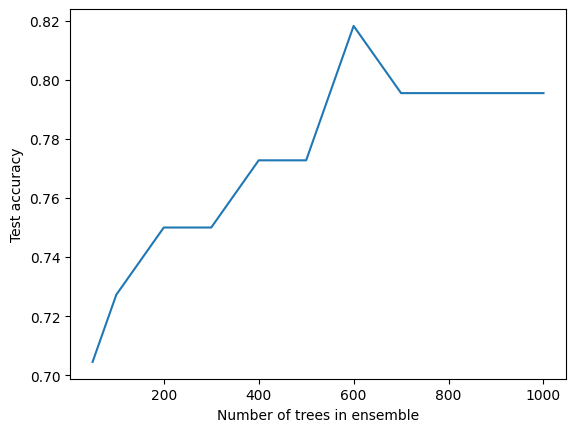

In [ ]:
scores = {}
for num_trees in [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]:
    model = GradientBoostingClassifier(n_estimators=num_trees,
                                       max_depth=2,
                                       random_state=1)
    model.fit(X_train, y_train)
    prediction_test = model.predict(X_test)
    accuracy_test = metrics.accuracy_score(y_test, prediction_test)
    scores[num_trees] = accuracy_test
Series(scores).sort_index().plot()
xlabel('Number of trees in ensemble')
ylabel('Test accuracy')

Text(0, 0.5, 'Test accuracy')

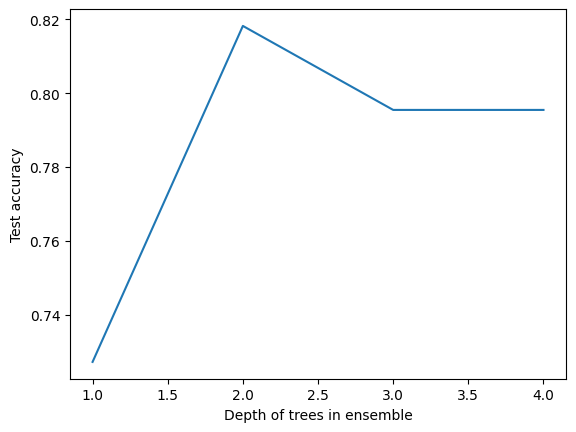

In [ ]:
# How about the depth of the trees?
scores = {}
for depth in range(1, 5):
    model = GradientBoostingClassifier(n_estimators=600,
                                       max_depth=depth,
                                       random_state=1)
    model.fit(X_train, y_train)
    prediction_test = model.predict(X_test)
    accuracy_test = metrics.accuracy_score(y_test, prediction_test)
    scores[depth] = accuracy_test
Series(scores).sort_index().plot()
xlabel('Depth of trees in ensemble')
ylabel('Test accuracy')

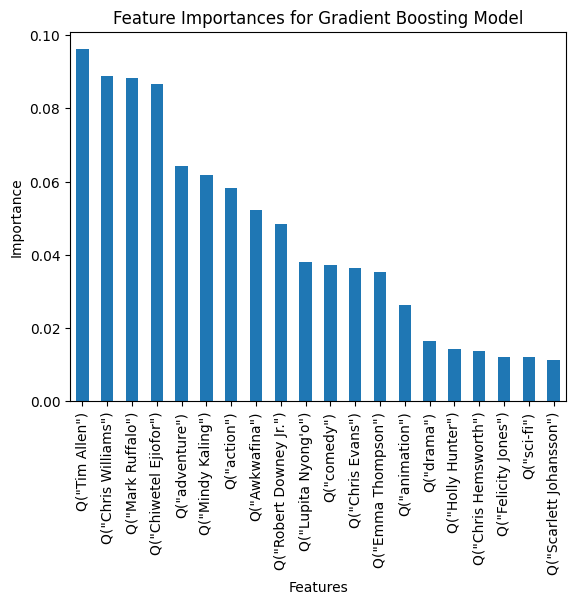

In [ ]:
importances = models["Gradient Boosting"].feature_importances_

# Map the feature importances to the corresponding genre names
genre_importances = pd.Series(importances, index=X.columns)

# Sort the importances
sorted_importances = genre_importances.sort_values(ascending=False)

# Plot the importances
sorted_importances.head(20).plot(kind='bar')
plt.title('Feature Importances for Gradient Boosting Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

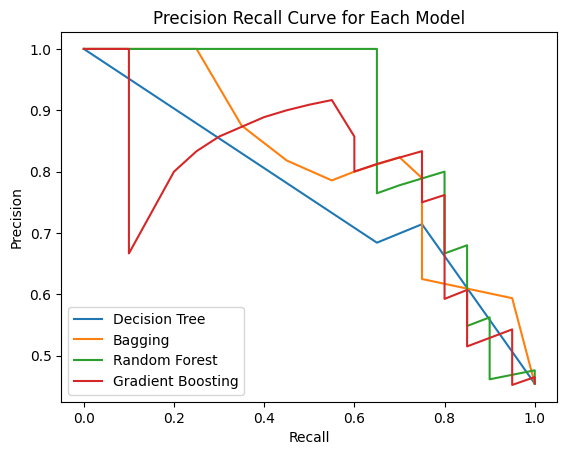

In [ ]:
for index, (name, model) in enumerate(models.items()):
    predictions = model.predict_proba(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, predictions[:, 1])
    plot(recall, precision, label=name)

plt.title('Precision Recall Curve for Each Model')
xlabel('Recall')
ylabel('Precision')
legend(loc='best')

In [ ]:
# Filter out features with importance less than 0.01
significant_importances = sorted_importances[sorted_importances >= 0.01]

# Now, use these significant features to filter your dataset
significant_features = significant_importances.index.tolist()
significant_features

['Q("Tim Allen")',
 'Q("Chris Williams")',
 'Q("Mark Ruffalo")',
 'Q("Chiwetel Ejiofor")',
 'Q("adventure")',
 'Q("Mindy Kaling")',
 'Q("action")',
 'Q("Awkwafina")',
 'Q("Robert Downey Jr.")',
 'Q("Lupita Nyong\'o")',
 'Q("comedy")',
 'Q("Chris Evans")',
 'Q("Emma Thompson")',
 'Q("animation")',
 'Q("drama")',
 'Q("Holly Hunter")',
 'Q("Chris Hemsworth")',
 'Q("Felicity Jones")',
 'Q("sci-fi")',
 'Q("Scarlett Johansson")',
 'Q("Anthony Russo")']

Feature selection

In [ ]:
# Create formula
formula = 'is_hit ~ ' + ' + '.join([''+x+'' \
                                    for x in significant_features])
print(formula)

is_hit ~ Q("Tim Allen") + Q("Chris Williams") + Q("Mark Ruffalo") + Q("Chiwetel Ejiofor") + Q("adventure") + Q("Mindy Kaling") + Q("action") + Q("Awkwafina") + Q("Robert Downey Jr.") + Q("Lupita Nyong'o") + Q("comedy") + Q("Chris Evans") + Q("Emma Thompson") + Q("animation") + Q("drama") + Q("Holly Hunter") + Q("Chris Hemsworth") + Q("Felicity Jones") + Q("sci-fi") + Q("Scarlett Johansson") + Q("Anthony Russo")


In [ ]:
# Create design matrices
Y, X = dmatrices(formula, recent_movies_with_stars, return_type='dataframe')
y = Y['is_hit'].values

In [ ]:
# Create training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=1)

In [ ]:
# All the models we want to test out
models = {}
models['Decision Tree'] = \
    tree.DecisionTreeClassifier(criterion='entropy')

models['Bagging'] = \
    BaggingClassifier(
        tree.DecisionTreeClassifier(criterion='entropy'),
        random_state=1)

models['Random Forest'] = \
    RandomForestClassifier(n_estimators=40,
                           random_state=1)

models['Gradient Boosting'] = \
    GradientBoostingClassifier(n_estimators=40,
                               max_depth=1,
                               random_state=1)

In [ ]:
for name, model in models.items():
    print('Fitting', name)
    model.fit(X_train, y_train)

Fitting Decision Tree
Fitting Bagging
Fitting Random Forest
Fitting Gradient Boosting


In [ ]:
from sklearn import metrics
from pandas import Series, DataFrame

accuracy_train = {}
accuracy_test = {}
for name, model in models.items():
    prediction_train = model.predict(X_train)
    accuracy_train[name] = metrics.accuracy_score(y_train, prediction_train)
    prediction_test = model.predict(X_test)
    accuracy_test[name] = metrics.accuracy_score(y_test, prediction_test)

df = DataFrame({'Training Accuracy':accuracy_train, 'Test Accuracy':accuracy_test})
df

,Training Accuracy,Test Accuracy
Decision Tree,0.950495,0.727273
Bagging,0.940594,0.704545
Random Forest,0.950495,0.727273
Gradient Boosting,0.881188,0.659091


Text(0, 0.5, 'Test accuracy')

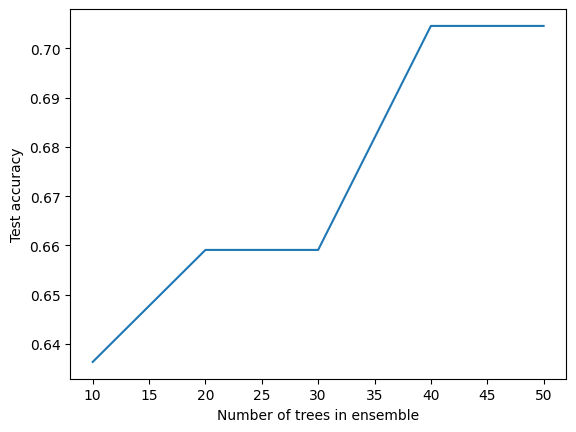

In [ ]:
scores = {}
for num_trees in [10, 20, 30, 40, 50]:
    model = GradientBoostingClassifier(n_estimators=num_trees,
                                       max_depth=2,
                                       random_state=1)
    model.fit(X_train, y_train)
    prediction_test = model.predict(X_test)
    accuracy_test = metrics.accuracy_score(y_test, prediction_test)
    scores[num_trees] = accuracy_test
Series(scores).sort_index().plot()
xlabel('Number of trees in ensemble')
ylabel('Test accuracy')

Text(0, 0.5, 'Test accuracy')

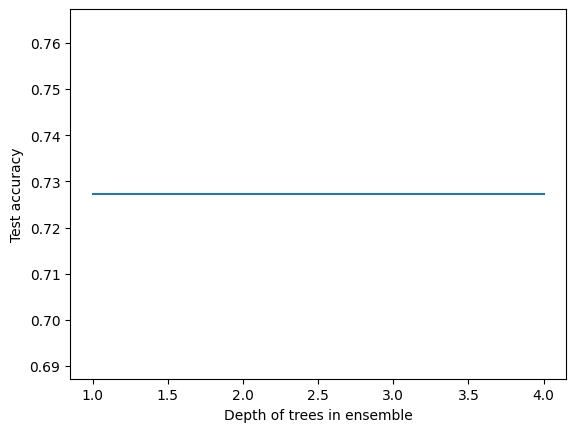

In [ ]:
# How about the depth of the trees?
scores = {}
for depth in range(1, 5):
    model = GradientBoostingClassifier(n_estimators=600,
                                       max_depth=depth,
                                       random_state=1)
    model.fit(X_train, y_train)
    prediction_test = model.predict(X_test)
    accuracy_test = metrics.accuracy_score(y_test, prediction_test)
    scores[depth] = accuracy_test
Series(scores).sort_index().plot()
xlabel('Depth of trees in ensemble')
ylabel('Test accuracy')

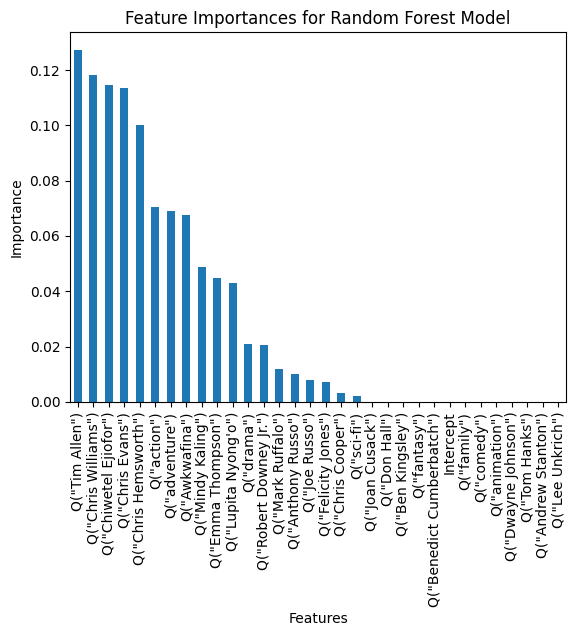

In [ ]:
importances = models["Gradient Boosting"].feature_importances_

# Map the feature importances to the corresponding genre names
genre_importances = pd.Series(importances, index=X.columns)

# Sort the importances
sorted_importances = genre_importances.sort_values(ascending=False)

# Plot the importances
sorted_importances.plot(kind='bar')
plt.title('Feature Importances for Random Forest Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

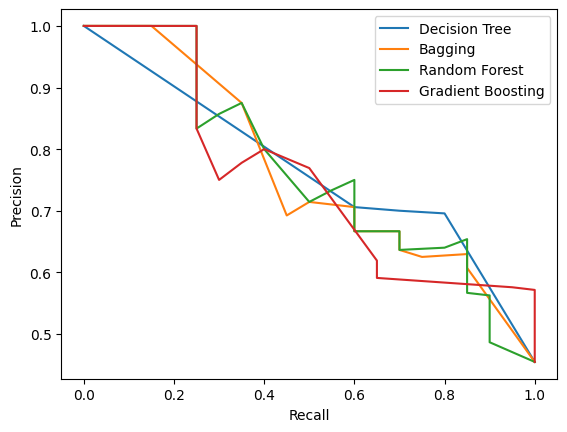

In [ ]:
for index, (name, model) in enumerate(models.items()):
    predictions = model.predict_proba(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, predictions[:, 1])
    plot(recall, precision, label=name)

xlabel('Recall')
ylabel('Precision')
legend(loc='best')